##  Exercise Session 6: Decision Trees, Random Forests

**Total points (10 + 1 Bonus Point)**

Suppose you are a data scientist working for a bank. Your bank wants to identify which of its customers are likely to default on their loans. You have been given a dataset of customer information (under Exercises/Session_06 folder on OLAT), including their credit score, income, etc. Your task is to build a decision tree and random forest model that can predict which customers are likely to default on their loans.


The deadline to submit your solutions to this exercise is **the Tuesday in 2 weeks (09.04.2024) by the end of the day (23:59 CET)**. 

Please submit your solutions in python notebook format and rename the file as "**Exercise_06_FirstName_LastName.ipynb**"

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import plot_confusion_matrix, 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from matplotlib.pylab import rcParams

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Decision Trees and Random Forests 

In [2]:
#Load the dataset into a pandas DataFrame.
df = pd.read_csv('data/Loan_Default.csv')
df.head()


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


**Task 1 (1 point): delete the categorical columns and columns named ID and year**

In [3]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
df.drop(non_numeric_columns, axis=1, inplace=True)


In [4]:
df.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [5]:
df.drop(['ID', 'year'], axis=1, inplace=True)


In [6]:
df.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


**Task 2 (1 point): select Status column as output (y) and other columns as an input (X)**

In [7]:
X = df.drop('Status', axis=1)
y = df['Status']


**Task 3 (1 point): plot barplot of the status column**

<Axes: xlabel='Status', ylabel='count'>

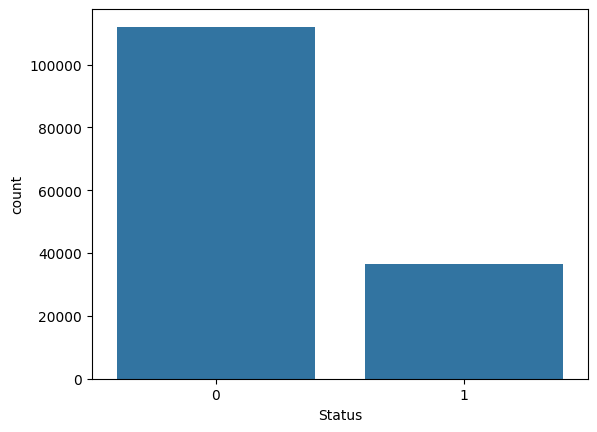

In [8]:
sns.countplot(data=df, x='Status')


**Task 4 (1 point): split the dataset to train and test sets, set the test set size to 20%**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Task 5 (1 point): check if there is nan values in X_train and  X_test**

In [10]:

print(X_train.isnull().any())
print(X_test.isnull().any())


loan_amount             False
rate_of_interest         True
Interest_rate_spread     True
Upfront_charges          True
term                     True
property_value           True
income                   True
Credit_Score            False
LTV                      True
dtir1                    True
dtype: bool
loan_amount             False
rate_of_interest         True
Interest_rate_spread     True
Upfront_charges          True
term                     True
property_value           True
income                   True
Credit_Score            False
LTV                      True
dtir1                    True
dtype: bool


**Task 6 (1 point): replace NANs with 0s both in X_train, X_test**

In [11]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)



**Task 7 (1 point): train Decision Tree and test the decision tree on test set. Plot confusion matrix and print classification report**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



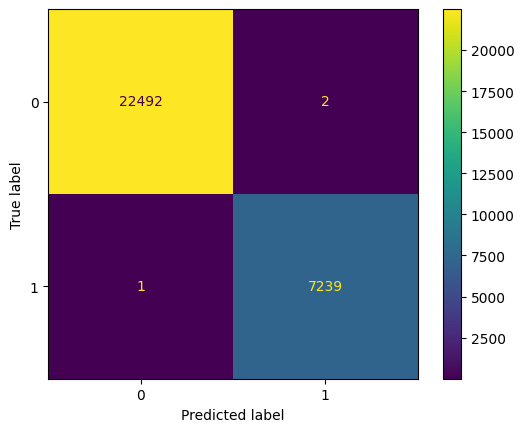

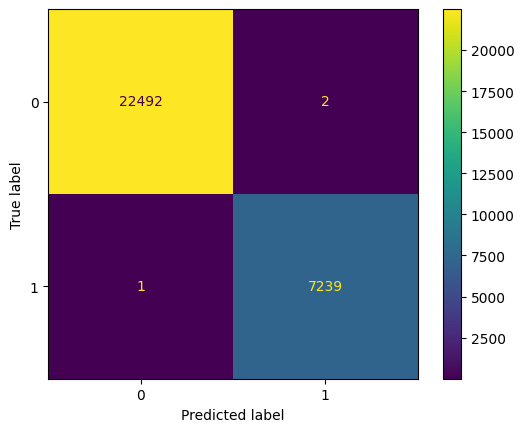

In [12]:
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# cmatrix
cm_display = ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test)
cm_display.plot()

# report
report = classification_report(y_test, y_pred_dt)
print(report)


**Task 8 (1 point): plot the importance of each feature as a bar plot and plot the decision tree**

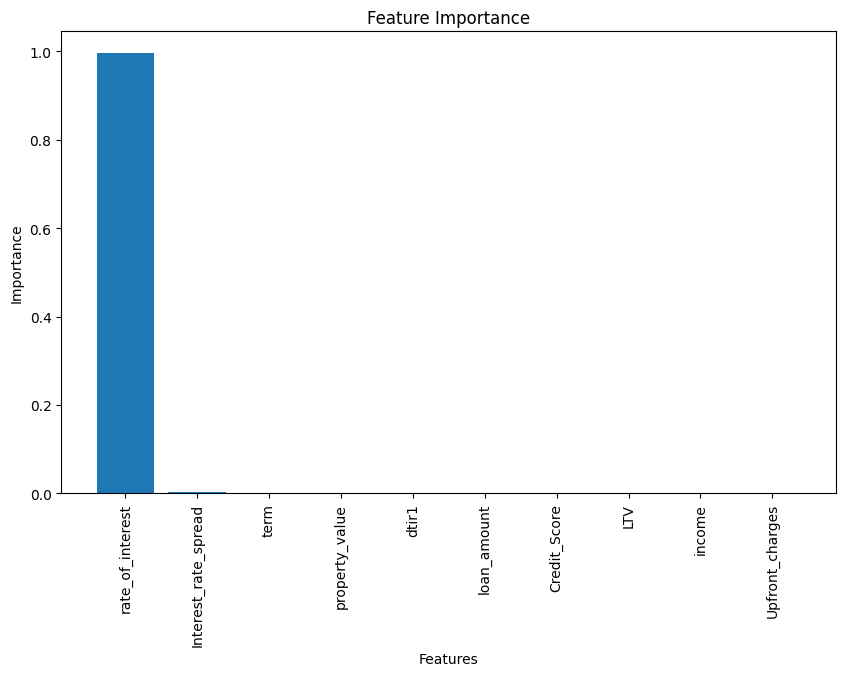

In [13]:
importances = dt_classifier.feature_importances_

indices = np.argsort(importances)[::-1]
feature_names = X_train.columns[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



**Task 9 (1 point): train the same data with random forest and test on test set. Plot confusion matrix and print classification report**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22494
           1       1.00      1.00      1.00      7240

    accuracy                           1.00     29734
   macro avg       1.00      1.00      1.00     29734
weighted avg       1.00      1.00      1.00     29734



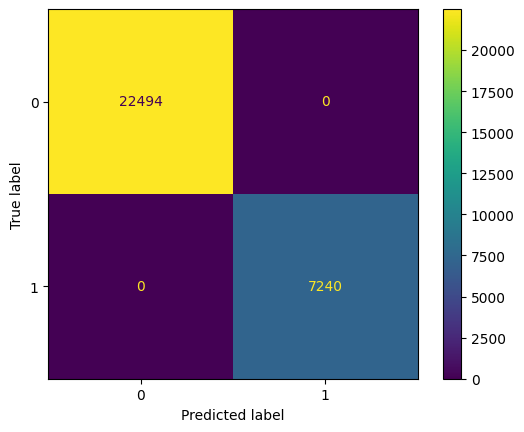

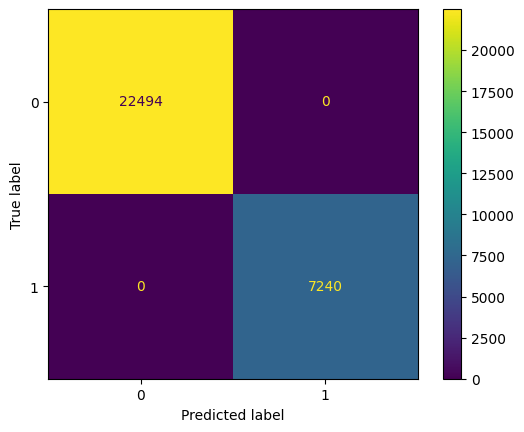

In [14]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# cmatrix
cm_display = ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test)
cm_display.plot()

# report
report = classification_report(y_test, y_pred_rf)
print(report)


**Task 10 (1 point) : Plot the feature importance as a bar plot**

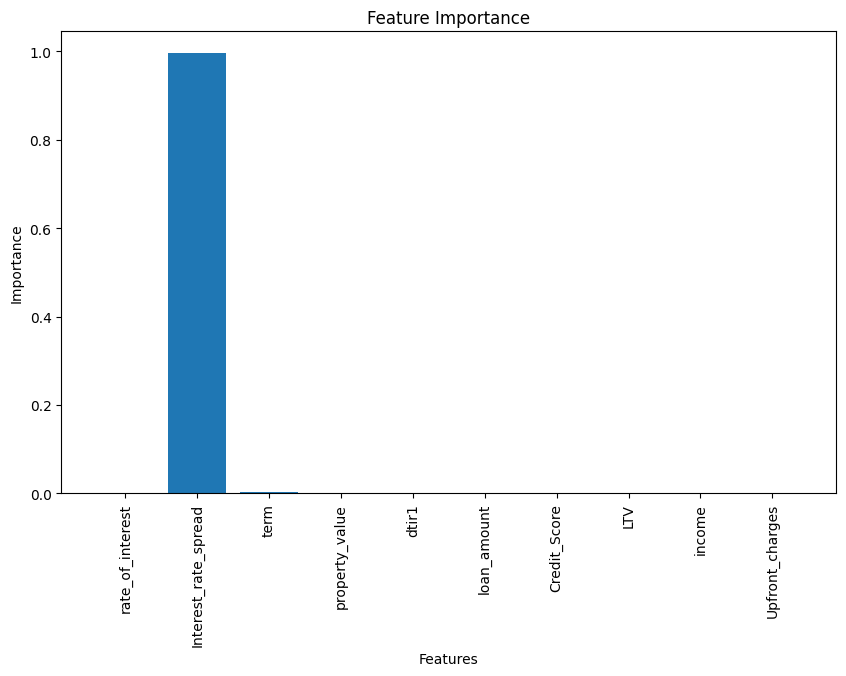

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()



**Task 11 (bonus point):Which model worked the best? Justify it.**

based on the results the random forrest one, did predict in testing with 100% accuracy. so i would say it is best.